# Exercise 1.1: Radial light rays in Schwarzschild spacetime 

The ordinary differential equation (ODE) that describes radially outgoing null geodesics (i.e. light rays) is given by

\begin{equation}
\frac{dr}{d\overline{t}} = \frac{1-2M/r}{1+2M/r}
\end{equation}

With given substitution <br>
$\tilde{t} = \overline{t}/M \leftrightarrow \overline{t} = \tilde{t}M$ <br>
$\tilde{r} = r/M \leftrightarrow r = \tilde{r}M$ <br>
the mass M can be eliminated so that (1) is given as  

\begin{equation}
\frac{d\tilde{r}}{d\tilde{t}} = \frac{1-2/\tilde{r}}{1+2/\tilde{r}}
\end{equation}

The ODE in (2) will be solved numerically for $ 0 \leqslant \tilde{t} \leqslant 10 $ by defining a function with $r_0$ as initial point

In [1]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

# Function for numerical integration 
def integrate_sample_ode(r0):
    t_history = [ 0. ]  
    r_history = [ r0 ]
    r = ode(lambda t, r:(1-2/r)/(1+2/r)).set_integrator('zvode', method='bdf').set_initial_value(r_history[0], t_history[0])
    dt = 0.1
    while r.successful() and r.t < 10.:
        r_history.append(r.integrate(r.t + dt)[0])
        t_history.append(r.t)
    return t_history, r_history

The following code generates a plot $r(t)$ for a few representative light outgoing light rays

C:\Users\Nina\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


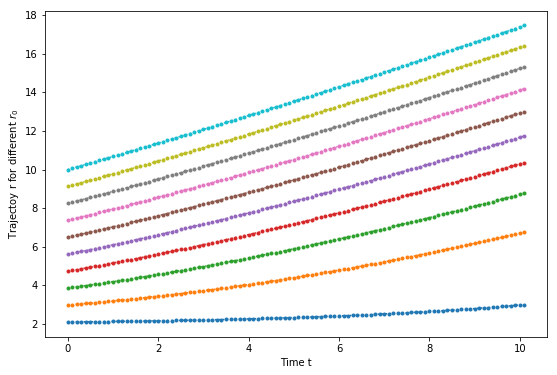

In [2]:
plt.figure(figsize=(9, 6))
for r0 in np.linspace(2.1, 10., 10):
    t, r = integrate_sample_ode(r0=r0)
    plt.plot(t, r, marker='.', ls='dotted')
    plt.xlabel("Time t")
    plt.ylabel("Trajectoy r for different $r_0$")

### Interpretation of results

As can be seen in the plot, light rays will follow the curvature of spacetime generated by a black hole's mass.
With ever increasing proximity to the event horizon given by $r_0$, the light rays will undergo increased bending.